In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN




In [2]:
data = pd.read_csv('fraud.csv')

In [5]:
def prepare_data(df):
    df = df.replace(' ', np.nan)
    df = df.dropna()
    df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount']]=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount']].astype('int64')
    
    return df

In [8]:
# Count the occurrences of fraud and no fraud and print them
occ = data['Class'].value_counts()
occ

0    7983
1      17
Name: Class, dtype: int64

In [9]:
# Print the ratio of fraud cases
ratio_cases = occ/len(data.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.002125
Ratio of non-fraudulent cases: 0.997875


# The ratio of fraudulent transactions is very low. This is a case of class imbalance problem


In [11]:
def prep_data(data: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = data.iloc[:, 2:30].values
    y = data.Class.values
    return X, y

In [12]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [13]:
# Create X and y from the prep_data function 
X, y = prep_data(data)

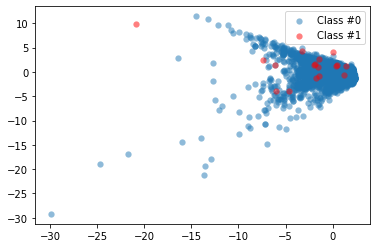

In [14]:

plot_data(X, y)

 Increase successful detections with data resampling

In [15]:
# Define resampling method and split into train and test
#method = SMOTE(kind='borderline1')
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
#X_resampled, y_resampled = method.fit_sample(X_train, y_train)

# Continue fitting the model and obtain predictions
#model = LogisticRegression()
#model.fit(X_resampled, y_resampled)

# Get model performance metrics
#predicted = model.predict(X_test)
#print(classification_report(y_test, predicted))

In [73]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

In [55]:
# Run the prep_data function
X, y = prep_data(data)

In [56]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (8000, 28)
y shape: (8000,)


In [17]:
# Define the resampling method
method = SMOTE()

In [19]:
# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

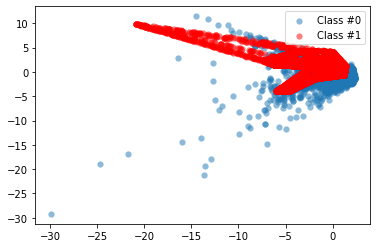

In [20]:
# Plot the resampled data
plot_data(X_resampled, y_resampled)

The minority class is now much more prominently visible in our data. To see the results of SMOTE even better, we'll compare it to the original data next.

Compare SMOTE to original data

In [21]:
pd.value_counts(pd.Series(y))

0    7983
1      17
dtype: int64

In [22]:
pd.value_counts(pd.Series(y_resampled))

0    7983
1    7983
dtype: int64

In [23]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

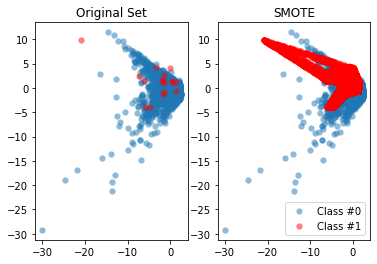

In [24]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class. Visualizing the data shows the effect on the data very clearly.

In [50]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [51]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95383.605161,0.023553,-0.008543,-0.002408,-0.034757,-0.020108,0.003264,0.023668,-0.004720,-0.010660,...,-0.00692,-0.004279,0.027999,0.006689,-0.000550,-0.000616,0.000659,-0.006740,0.005625,89.721167
1,83000.176471,-3.235382,1.317054,-3.762234,2.801140,-0.941354,-1.184692,-3.527826,-0.108892,-1.546536,...,-0.29245,0.361582,0.159210,-0.119366,-0.144082,0.155552,0.038765,0.265996,0.131853,65.287647


In [54]:
data['flag_as_fraud'] = np.where(np.logical_and(data.V1 < -3, data.V3 < -5), 1, 0)

In [55]:
pd.crosstab(data.Class, data.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0,1
Actual Fraud,,
0,7949,34
1,13,4


# With this rule, 4 out of 17 fraud cases are detected, 13 are not detected, and 34 false positives are identified